In [1]:
# a demo for sunpy-map coordinate compared to 'old-school'

import sys
sys.path.insert(1, '../pro/src') # make sure to use the code in this repo

%load_ext autoreload
%autoreload 2

import lofarSun
import matplotlib.pyplot as plt
from lofarSun import lofarData
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=lofarData.LofarDataBF()
dataset.load_fits('../../test_mini_cube.fits')
freq=50
dtime = datetime.datetime(2019, 4, 8, 9, 47, 4, 416000, tzinfo=datetime.timezone.utc)
time=mdates.date2num(dtime)
X,Y,data_bf,x,y,Ibeam=dataset.bf_image_by_freq_time(freq,time,asecpix=20,extrap=True,interpm='cubic')

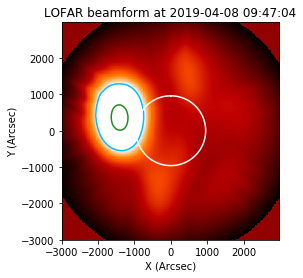

In [14]:
plt.imshow(data_bf)
ax = plt.gca()
im = ax.imshow(data_bf, cmap='gist_heat',
  origin='lower',extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
ax.set_xlabel('X (Arcsec)')
ax.set_ylabel('Y (Arcsec)')
ax.set_aspect('equal', 'box')
ax.contour(X,Y,data_bf/np.max(data_bf),levels=[0.5,0.9],colors=['deepskyblue','forestgreen'])
ax.set_title('LOFAR beamform at '+str(dtime)[0:19])
ax.plot(960*np.sin(np.arange(0,2*np.pi,0.001)),
                        960*np.cos(np.arange(0,2*np.pi,0.001)),'w')

ax.get_images()[1].set_clim([0,np.max(data_bf)/2])